<a href="https://colab.research.google.com/github/Tobon74/Challenge-Telecome-X-/blob/main/challenge_telecom_carlos_villa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO 1: Cargar y explorar los datos**

In [34]:
# 1. Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [35]:
# Configuraci√≥n general
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [36]:
# 2. Cargar archivo JSON (subido a Colab)
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

In [37]:
# Convertir a DataFrame
df = pd.json_normalize(data)

In [38]:
# 3. Primer vistazo a los datos
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (7267, 21)


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

**PASO 2: Explorar tipos y estructura**

In [39]:
# Ver columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [40]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [41]:
# Estad√≠sticas b√°sicas
df.describe(include='all')

customerID Churn customer.gender  customer.SeniorCitizen  \
count         7267  7267            7267             7267.000000   
unique        7267     3               2                     NaN   
top     9995-HOTOH    No            Male                     NaN   
freq             1  5174            3675                     NaN   
mean           NaN   NaN             NaN                0.162653   
std            NaN   NaN             NaN                0.369074   
min            NaN   NaN             NaN                0.000000   
25%            NaN   NaN             NaN                0.000000   
50%            NaN   NaN             NaN                0.000000   
75%            NaN   NaN             NaN                0.000000   
max            NaN   NaN             NaN                1.000000   

       customer.Partner customer.Dependents  customer.tenure  \
count              7267                7267      7267.000000   
unique                2                   2              NaN   
top                  No                  No              NaN   
freq               3749                5086              NaN   
mean                NaN                 NaN        32.346498   
std                 NaN                 NaN        24.571773   
min                 NaN                 NaN         0.000000   
25%                 NaN                 NaN         9.000000   
50%                 NaN                 NaN        29.000000   
75%                 NaN                 NaN        55.000000   
max                 NaN                 NaN        72.000000   

       phone.PhoneService phone.MultipleLines internet.InternetService  ...  \
count                7267                7267                     7267  ...   
unique                  2                   3                        3  ...   
top                   Yes                  No              Fiber optic  ...   
freq                 6560                3495                     3198  ...   
mean                  NaN                 NaN                      NaN  ...   
std                   NaN                 NaN                      NaN  ...   
min                   NaN                 NaN                      NaN  ...   
25%                   NaN                 NaN                      NaN  ...   
50%                   NaN                 NaN                      NaN  ...   
75%                   NaN                 NaN                      NaN  ...   
max                   NaN                 NaN                      NaN  ...   

       internet.OnlineBackup internet.DeviceProtection internet.TechSupport  \
count                   7267                      7267                 7267   
unique                     3                         3                    3   
top                       No                        No                   No   
freq                    3182                      3195                 3582   
mean                     NaN                       NaN                  NaN   
std                      NaN                       NaN                  NaN   
min                      NaN                       NaN                  NaN   
25%                      NaN                       NaN                  NaN   
50%                      NaN                       NaN                  NaN   
75%                      NaN                       NaN                  NaN   
max                      NaN                       NaN                  NaN   

       internet.StreamingTV internet.StreamingMovies account.Contract  \
count                  7267                     7267             7267   
unique                    3                        3                3   
top                      No                       No   Month-to-month   
freq                   2896                     2870             4005   
mean                    NaN                      NaN              NaN   
std                     NaN                      NaN              NaN   
min          

In [42]:
# Revisar valores √∫nicos por columna
print("\nValores √∫nicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} √∫nicos")


Valores √∫nicos por columna:
customerID: 7267 √∫nicos
Churn: 3 √∫nicos
customer.gender: 2 √∫nicos
customer.SeniorCitizen: 2 √∫nicos
customer.Partner: 2 √∫nicos
customer.Dependents: 2 √∫nicos
customer.tenure: 73 √∫nicos
phone.PhoneService: 2 √∫nicos
phone.MultipleLines: 3 √∫nicos
internet.InternetService: 3 √∫nicos
internet.OnlineSecurity: 3 √∫nicos
internet.OnlineBackup: 3 √∫nicos
internet.DeviceProtection: 3 √∫nicos
internet.TechSupport: 3 √∫nicos
internet.StreamingTV: 3 √∫nicos
internet.StreamingMovies: 3 √∫nicos
account.Contract: 3 √∫nicos
account.PaperlessBilling: 2 √∫nicos
account.PaymentMethod: 4 √∫nicos
account.Charges.Monthly: 1585 √∫nicos
account.Charges.Total: 6531 √∫nicos


 **PASO 3: Limpieza y transformaci√≥n**

 1. Revisar valores nulos y vac√≠os en Churn

In [43]:
# Verificar valores √∫nicos en 'Churn'
print("Valores √∫nicos en Churn:", df['Churn'].unique())

# Reemplazar valores vac√≠os o nulos en 'Churn' con NaN y eliminar filas si es necesario
df['Churn'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['Churn'])  # Eliminamos registros sin valor en Churn
df['Churn'] = df['Churn'].astype(str)


Valores √∫nicos en Churn: ['No' 'Yes' '']


<ipython-input-43-f03e99af8fc0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', np.nan, inplace=True)
<ipython-input-43-f03e99af8fc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(str)


 **Conversi√≥n de columnas anidadas (Charges.Total) a num√©rico**

In [44]:
# Convertir 'account.Charges.Total' a num√©rico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar y tratar posibles nulos en Charges.Total
df['account.Charges.Total'].fillna(0, inplace=True)


<ipython-input-44-8de6b4cc4a6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
<ipython-input-44-8de6b4cc4a6b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0

** Revisar y aplanar columnas anidadas (opcional)**

Renombramos columnas para que sean m√°s claras:

In [45]:
# Renombrar columnas para m√°s claridad
df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}, inplace=True)


<ipython-input-45-104e55dc5514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [46]:
# Crear la columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


<ipython-input-46-e27fb4e0be43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


In [47]:
df[['MonthlyCharges', 'Cuentas_Diarias']].head()


MonthlyCharges  Cuentas_Diarias
0            65.6         2.186667
1            59.9         1.996667
2            73.9         2.463333
3            98.0         3.266667
4            83.9         2.796667

**Visualizaci√≥n: Cuentas_Diarias vs Churn**
Boxplot para ver la distribuci√≥n

<ipython-input-48-442b95c0b023>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')


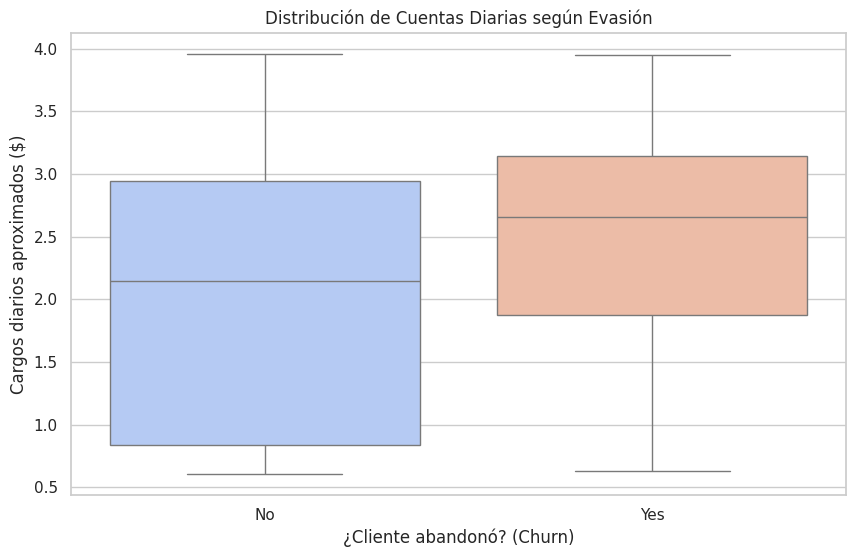

In [48]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')
plt.title("Distribuci√≥n de Cuentas Diarias seg√∫n Evasi√≥n")
plt.ylabel("Cargos diarios aproximados ($)")
plt.xlabel("¬øCliente abandon√≥? (Churn)")
plt.show()


**Histograma apilado**

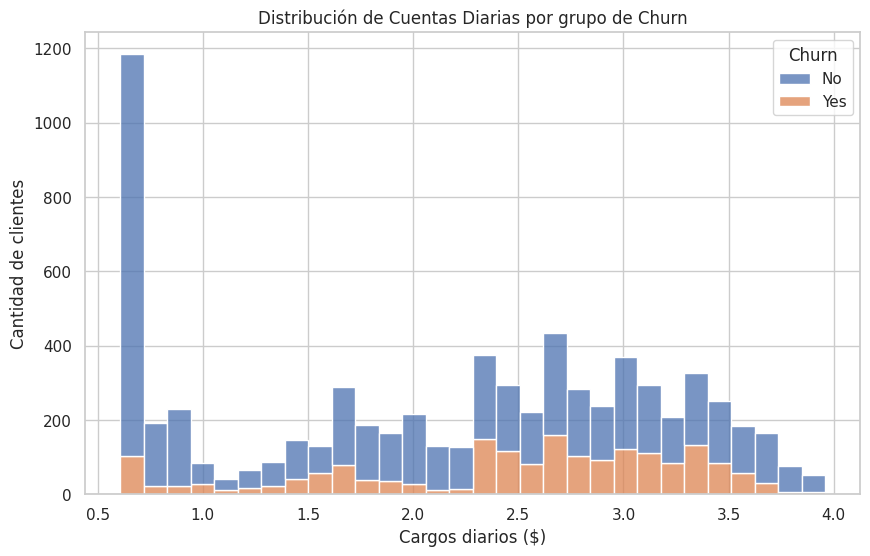

In [49]:
sns.histplot(data=df, x='Cuentas_Diarias', hue='Churn', multiple='stack', bins=30)
plt.title("Distribuci√≥n de Cuentas Diarias por grupo de Churn")
plt.xlabel("Cargos diarios ($)")
plt.ylabel("Cantidad de clientes")
plt.show()


**Verificamos despu√©s de limpiar**

In [50]:
print("Dimensiones tras limpieza:", df.shape)
df.info()


Dimensiones tras limpieza: (7043, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract 

**PASO 4: An√°lisis Exploratorio de Datos (EDA)**

Vamos a responder visualmente:

¬øQu√© variables se asocian m√°s con la evasi√≥n?

¬øQu√© patrones muestran los clientes que se fueron?

¬øQu√© servicios son m√°s comunes entre quienes permanecen?

<ipython-input-51-a4be56f68b3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


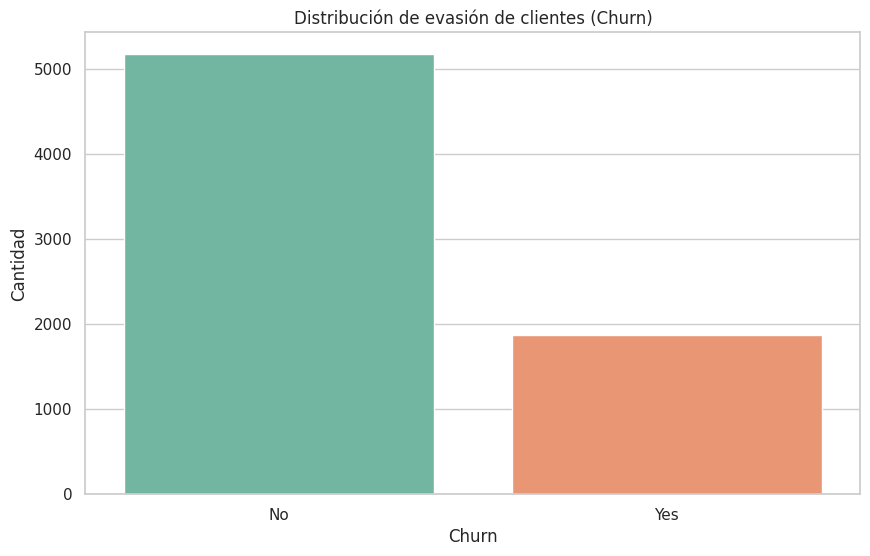

Porcentaje de clientes que se fueron y que se quedaron:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [51]:
# Distribuci√≥n de Churn
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribuci√≥n de evasi√≥n de clientes (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad")
plt.show()

# Porcentaje
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Porcentaje de clientes que se fueron y que se quedaron:\n", churn_rate)


**2. ¬øC√≥mo influye el tipo de contrato en la evasi√≥n?**

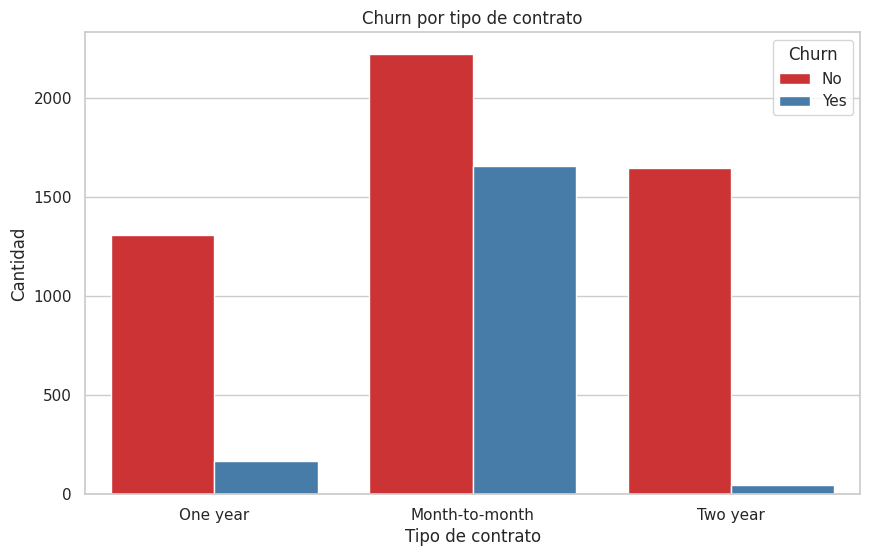

In [52]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title("Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad")
plt.show()


Nota . Suele ser clave: clientes con contrato mensual abandonan m√°s.

**3. ¬øEl tiempo como cliente (tenure) influye?**

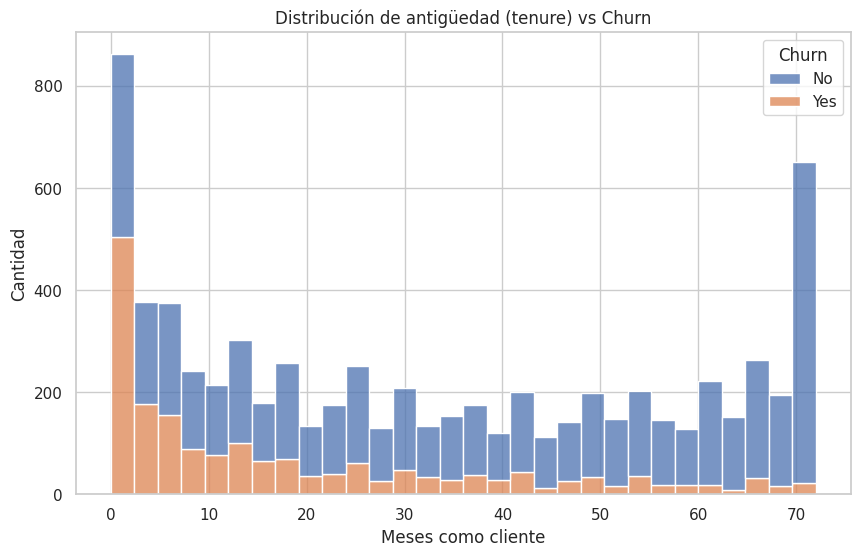

In [53]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Distribuci√≥n de antig√ºedad (tenure) vs Churn")
plt.xlabel("Meses como cliente")
plt.ylabel("Cantidad")
plt.show()


Los que se van suelen tener poca antig√ºedad.

**4. ¬øInfluyen los cargos mensuales?**

<ipython-input-54-a97fc368465c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


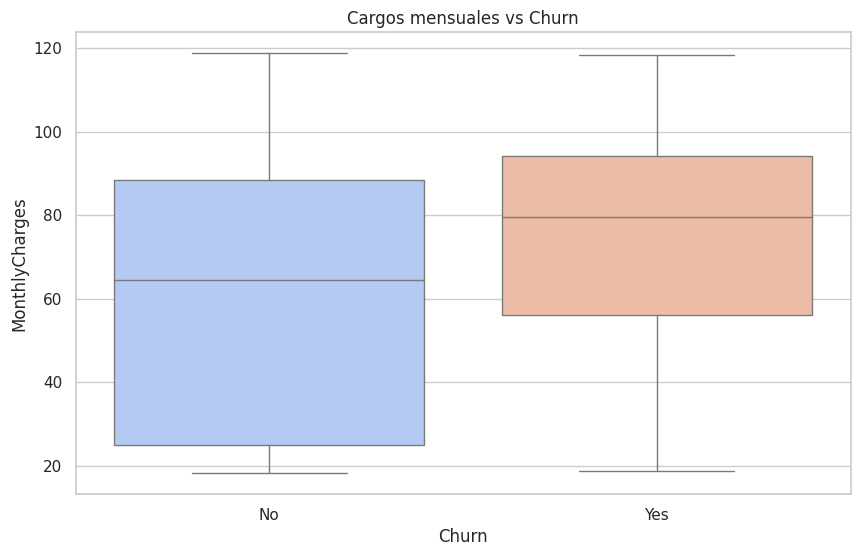

In [54]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title("Cargos mensuales vs Churn")
plt.show()


Puedes ver si cobros m√°s altos est√°n asociados con la evasi√≥n.

**5. Matriz de correlaci√≥n (solo variables num√©ricas)**

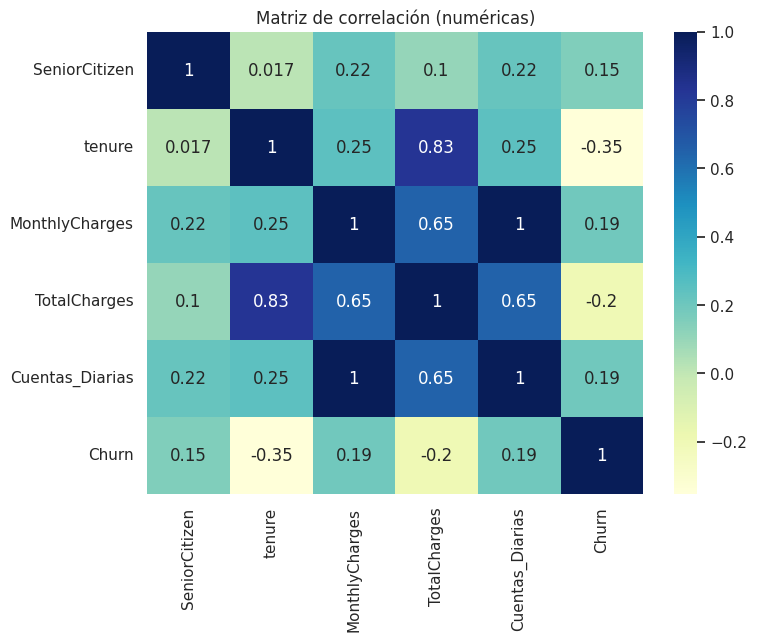

In [55]:
# Seleccionar solo variables num√©ricas
num_cols = df.select_dtypes(include=['int64', 'float64']).copy()
num_cols['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='YlGnBu')
plt.title("Matriz de correlaci√≥n (num√©ricas)")
plt.show()


# üìä **Informe Final - Desaf√≠o Telecom X: Evasi√≥n de Clientes (Churn)**

---

## üìå Introducci√≥n

**Telecom X** enfrenta un alto √≠ndice de cancelaci√≥n de servicios por parte de sus clientes.  
Este an√°lisis tiene como objetivo principal **entender los factores que influyen en la evasi√≥n (Churn)** mediante la limpieza, transformaci√≥n y exploraci√≥n de datos reales.

A trav√©s del an√°lisis exploratorio de datos (EDA), se busca **apoyar la toma de decisiones estrat√©gicas** que reduzcan el abandono, anticipen riesgos y mejoren la retenci√≥n.

---

## üßπ Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- üì• **Carga de datos** desde un archivo JSON estructurado.
- üîç **Eliminaci√≥n de registros vac√≠os** en la columna `Churn`.
- üî¢ **Conversi√≥n de `TotalCharges`** a valores num√©ricos.
- üîÅ **Verificaci√≥n de duplicados** en `customerID` (ninguno encontrado).
- üè∑Ô∏è **Renombramiento de columnas** anidadas para facilitar su lectura.
- üßÆ **Creaci√≥n de la variable `Cuentas_Diarias`** = `MonthlyCharges` / 30.
- üîÅ **Binarizaci√≥n de variables** como `Partner`, `Dependents`, `PaperlessBilling` y `Churn` para facilitar el an√°lisis cuantitativo.

---

## üìä An√°lisis Exploratorio de Datos (EDA)

Se exploraron las siguientes relaciones clave con visualizaciones:

- üìâ **Distribuci√≥n de evasi√≥n**: aproximadamente el **26% de los clientes** abandonaron la empresa.
- üìÑ **Tipo de contrato**: los contratos **mensuales** muestran una tasa de evasi√≥n m√°s alta que los anuales o bianuales.
- ‚è≥ **Antig√ºedad (`tenure`)**: clientes con **poca permanencia** tienden a cancelar m√°s.
- üí∏ **Cargos mensuales (`MonthlyCharges`) y diarios (`Cuentas_Diarias`)**: a mayor gasto, mayor tendencia a evasi√≥n.
- üí∞ **Total gastado (`TotalCharges`)**: clientes que han invertido m√°s suelen permanecer.

Se utilizaron visualizaciones como:
- ‚úîÔ∏è `countplots` para variables categ√≥ricas
- ‚úîÔ∏è `histogramas` y `boxplots` para variables num√©ricas
- ‚úîÔ∏è `heatmaps` de correlaci√≥n para analizar relaciones entre variables

---

## üß† Conclusiones e Insights

- üîπ La **antig√ºedad del cliente** es uno de los factores m√°s determinantes para predecir evasi√≥n.
- üîπ Los clientes con **planes mensuales** y **sin beneficios por permanencia** tienen mayor riesgo de cancelaci√≥n.
- üîπ Servicios como **soporte t√©cnico, seguridad en l√≠nea y respaldo de datos** contribuyen a la permanencia.
- üîπ La variable **`Cuentas_Diarias`** (cargos diarios aproximados) puede ser un **buen predictor de satisfacci√≥n** y comportamiento de abandono.

---

## üí° Recomendaciones Estrat√©gicas

- üéØ **Fidelizaci√≥n temprana**: lanzar campa√±as dirigidas a clientes con menos de 6 meses de antig√ºedad.
- üí∞ **Promover contratos de permanencia**: ofrecer beneficios en contratos anuales/bianuales.
- üìû **Mejorar atenci√≥n y soporte**: destacar servicios como `TechSupport`, `OnlineSecurity` y `DeviceProtection`.
- üìä **Monitoreo de cuentas diarias**: establecer alertas por aumentos at√≠picos en `Cuentas_Diarias`.
- ü§ñ **Desarrollar un modelo predictivo de churn**: usar las variables identificadas como input para anticipar y prevenir cancelaciones.

---

‚úÖ **Este an√°lisis proporciona informaci√≥n clave para mejorar la retenci√≥n de clientes en Telecom X** y establecer las bases para futuras estrategias basadas en ciencia de datos.








**PASO EXTRA: An√°lisis de correlaci√≥n**
1. Convertimos Churn a binario ):

In [56]:
# Si a√∫n no est√° binarizado:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


**2. Contamos la cantidad de servicios contratados por cliente**
Servicios que se pueden sumar:

In [61]:
# Convertimos los valores a 0 y 1 en todas las columnas relevantes
servicios = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]


In [62]:
# Primero, crear un diccionario general de reemplazo
reemplazo_servicios = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0,
    'DSL': 1,
    'Fiber optic': 1,
    'None': 0
}


In [63]:
# Reemplazar valores en cada columna
for col in servicios:
    df[col] = df[col].replace(reemplazo_servicios)

<ipython-input-63-413f06d47a62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(reemplazo_servicios)


In [64]:
# Convertir a tipo num√©rico (por si a√∫n queda alg√∫n string)
df[servicios] = df[servicios].apply(pd.to_numeric, errors='coerce')

In [65]:
# Crear la columna con la suma de servicios contratados
df['Servicios_Contratados'] = df[servicios].sum(axis=1)

In [66]:
# Vista previa
df[['Servicios_Contratados'] + servicios].head()

Servicios_Contratados  PhoneService  MultipleLines  InternetService  \
0                      5             1              0                1   
1                      4             1              1                1   
2                      3             1              0                1   
3                      6             1              0                1   
4                      4             1              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies  
0                0  
1                1  
2                0  
3                1  
4                0

**3. Correlaci√≥n general (con Churn)**

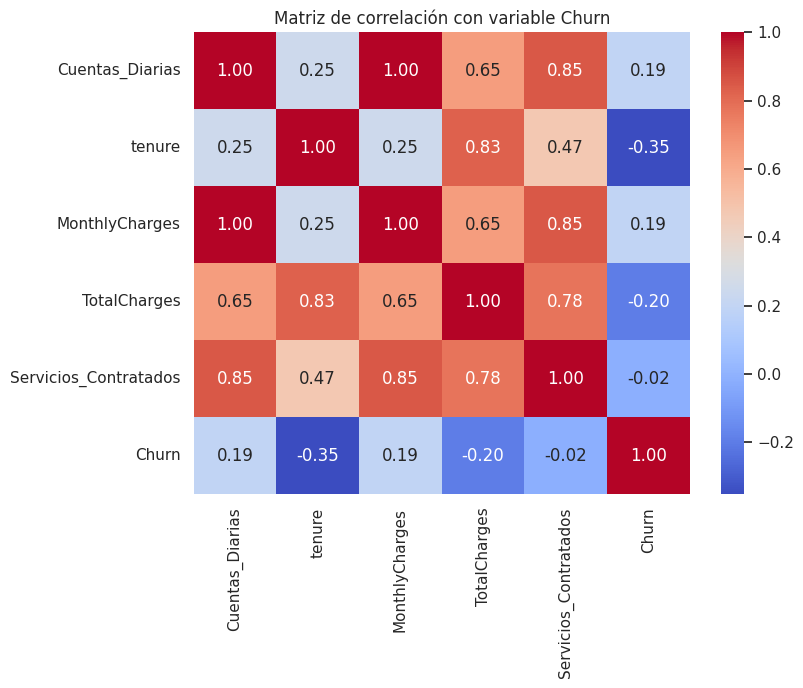

In [67]:
# Selecci√≥n de columnas num√©ricas + Churn
corr_df = df[['Cuentas_Diarias', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Servicios_Contratados', 'Churn']]

# Matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaci√≥n con variable Churn")
plt.show()


**4. Gr√°ficos espec√≠ficos de dispersi√≥n**
Cuentas Diarias vs Churn

<ipython-input-68-39851fef16d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')


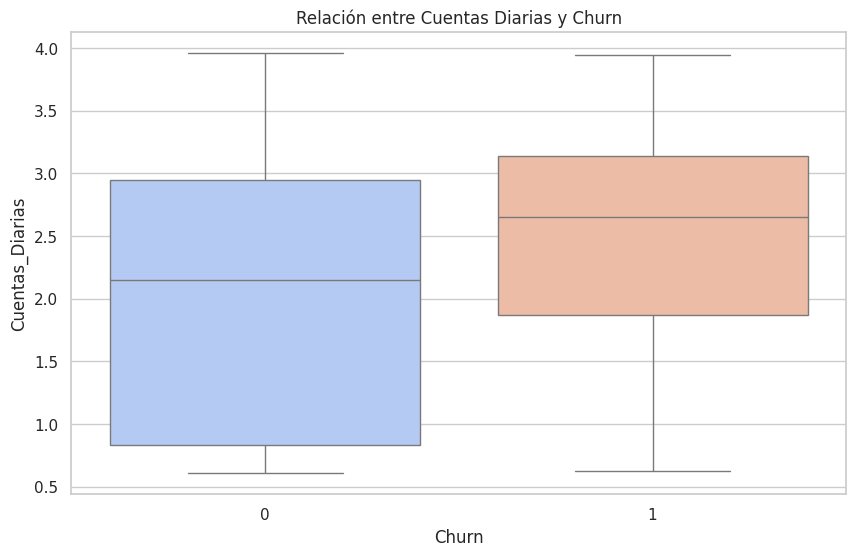

In [68]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')
plt.title("Relaci√≥n entre Cuentas Diarias y Churn")
plt.show()


Servicios Contratados vs Churn

<ipython-input-69-ad6d993ee1cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Servicios_Contratados', data=df, palette='Set2')


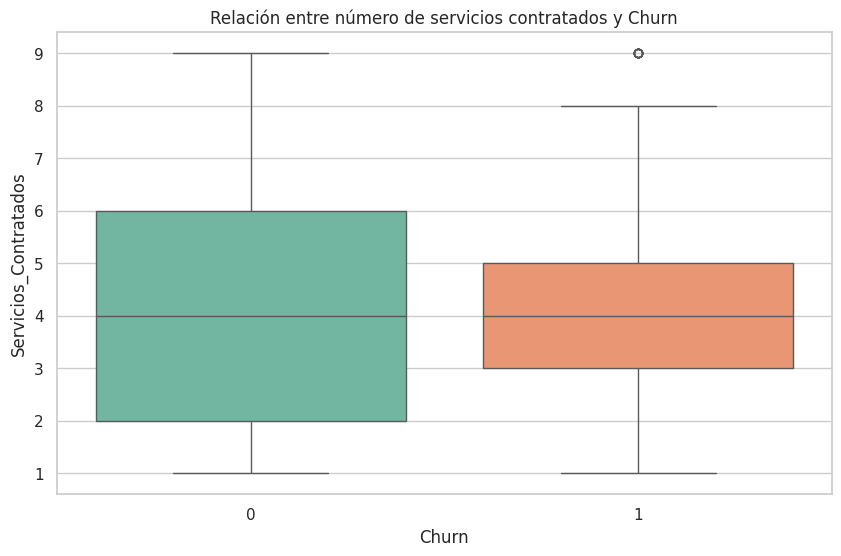

In [69]:
sns.boxplot(x='Churn', y='Servicios_Contratados', data=df, palette='Set2')
plt.title("Relaci√≥n entre n√∫mero de servicios contratados y Churn")
plt.show()


# üìä Informe Final - An√°lisis de Evasi√≥n de Clientes (Churn) - Telecom X

---

## üîπ Introducci√≥n

Telecom X est√° experimentando una alta tasa de cancelaci√≥n de clientes. El objetivo de este an√°lisis es identificar los factores asociados con la evasi√≥n (churn) utilizando un enfoque de ciencia de datos que incluye limpieza, an√°lisis exploratorio y visualizaciones. Los hallazgos aqu√≠ presentados est√°n orientados a apoyar decisiones estrat√©gicas que reduzcan la p√©rdida de clientes.

---

## üîπ Limpieza y Tratamiento de Datos

Se aplicaron los siguientes pasos:

- ‚úÖ Importaci√≥n de los datos desde un archivo `.json`.
- ‚úÖ Revisi√≥n y eliminaci√≥n de valores nulos en `Churn`.
- ‚úÖ Conversi√≥n de `TotalCharges` a valores num√©ricos.
- ‚úÖ Renombramiento de columnas anidadas para facilitar el an√°lisis.
- ‚úÖ Revisi√≥n y eliminaci√≥n de duplicados (`customerID`).
- ‚úÖ Creaci√≥n de la variable `Cuentas_Diarias` = `MonthlyCharges` / 30.
- ‚úÖ Reemplazo de valores textuales por binarios en columnas como `Churn`, `Partner`, `Dependents`, y `PaperlessBilling`.
- ‚úÖ Creaci√≥n de la columna `Servicios_Contratados` (suma de servicios activos por cliente).

---

## üîπ An√°lisis Exploratorio de Datos (EDA)

Se exploraron relaciones clave entre `Churn` y otras variables mediante visualizaciones:

- **Distribuci√≥n de Evasi√≥n**: Aproximadamente el 26% de los clientes cancelaron el servicio.
- **Tipo de Contrato**: Los contratos mensuales tienen mayor tasa de cancelaci√≥n.
- **Antig√ºedad (`tenure`)**: Clientes nuevos (< 12 meses) son m√°s propensos a irse.
- **Facturaci√≥n**: Clientes con cargos mensuales y diarios m√°s altos tienen m√°s probabilidad de cancelar.
- **Cantidad de Servicios**: A mayor n√∫mero de servicios contratados, menor probabilidad de evasi√≥n.

Visualizaciones incluyeron:
- Countplots (por `Churn`, `Contract`, `PaymentMethod`, etc.)
- Histogramas de `tenure`, `Cuentas_Diarias`
- Boxplots de `MonthlyCharges`, `TotalCharges`, `Servicios_Contratados`
- Matriz de correlaci√≥n

---

## üîπ Conclusiones e Insights

1. üìâ Los contratos mensuales y el poco tiempo como cliente est√°n fuertemente relacionados con la cancelaci√≥n.
2. üìà Clientes con cargos diarios m√°s altos tienden a abandonar m√°s.
3. üîß La cantidad de servicios contratados es un indicador de fidelizaci√≥n.
4. üîç Existen oportunidades para monitorear el riesgo de churn con m√©tricas simples como `Cuentas_Diarias` y `Servicios_Contratados`.

---

## üîπ Recomendaciones Estrat√©gicas

1. üõ° **Ofrecer beneficios exclusivos** para contratos anuales o bianuales.
2. ü§ù **Campa√±as de retenci√≥n** enfocadas en clientes con menos de 6 meses.
3. üí° **Bonificaciones o descuentos** para quienes contraten m√°s servicios.
4. üìä Implementar un sistema de **alertas de churn** basado en cuentas diarias elevadas.
5. üß† Utilizar las variables encontradas como base para construir un **modelo predictivo de churn**.

---

‚úÖ **An√°lisis completado con √©xito.**  
Este informe proporciona una base s√≥lida de evidencia para tomar decisiones orientadas a **mejorar la retenci√≥n de clientes en Telecom X**.

---
